In [71]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

In [2]:
game_csv = pd.read_csv('./data/Training_dataset_Original.csv',na_values=["NA", "na", "missing"])
gameDf = pd.DataFrame(game_csv)

dataDict = pd.read_csv('./data/Data_Dictionary.csv',na_values="NA")

#Leaderboard
leader_csv = pd.read_csv('./data/Leaderboard_dataset.csv',na_values=["NA", "na", "missing"])
leaderDf = pd.DataFrame(leader_csv)



In [3]:
print(gameDf.shape)
print(dataDict.shape)

(80000, 49)
(49, 2)


In [4]:
dic = dict(zip(dataDict.values[:, 1], dataDict.values[:, 0]))

In [5]:
dic['Average tenure of active revolving credit cards (in days)']

'mvar25'

In [6]:
#remove ID column
del gameDf[dic['Application ID (primary key)']]
del dic['Application ID (primary key)']

leaderAppID = leaderDf['application_key']
del leaderDf['application_key']
leaderX = leaderDf.copy()

In [7]:
gameX = gameDf.iloc[:,:-1]
gameY = gameDf.iloc[:,-1]

In [8]:
range(gameDf["mvar47"].shape[0])

range(0, 80000)

In [9]:
gameX["mvar47"][0]

'C'

In [10]:
#one hot encoding C=0 L=1
gameX['mvar47'] = pd.get_dummies(gameX['mvar47'])
leaderX['mvar47'] = pd.get_dummies(leaderX['mvar47'])

In [11]:
gameX["mvar47"].dtype

dtype('uint8')

# Synthesis begins

In [13]:
print(gameX.shape)
print(leaderX.shape)

gameX = gameX.assign(var345 = (1+gameX['mvar3'])*(1+gameX['mvar4'])*(1+gameX['mvar5']))
leaderX = leaderX.assign(var345 = (1+leaderX['mvar3'])*(1+leaderX['mvar4'])*(1+leaderX['mvar5']) )

print(gameX.shape)
print(leaderX.shape)

(80000, 47)
(25000, 47)


In [16]:
gameX  = gameX.assign(mvar678 = (gameX['mvar7'] + gameX['mvar8'])/(1+gameX['mvar6']))
leaderX = leaderX.assign(mvar678 = (leaderX['mvar7'] + leaderX['mvar8'])/(1+leaderX['mvar6']))

In [17]:
print(gameX.shape)
print(leaderX.shape)

(80000, 49)
(25000, 49)


In [18]:
#mvar36, 37, 38

In [19]:
df = gameX.copy()

temp37 = df['mvar37'].copy()

temp37[temp37.isnull()] = -1

temp37[temp37<0] = 0.458344
temp37[temp37==0] = 0.381028
temp37[temp37==1] = 0.309995
temp37[temp37==2] = 0.239528
temp37[temp37==3] = 0.186923
temp37[temp37==4] = 0.159852
temp37[temp37==5] = 0.14485
temp37[temp37==6] = 0.131449
temp37[temp37==7] = 0.118592
temp37[temp37==8] = 0.111612
temp37[temp37==9] = 0.102641
temp37[temp37>=10] = 0.0904

df = df.assign(var37 = temp37)
gameX = df.copy()



df = leaderX.copy()

temp37 = df['mvar37'].copy()

temp37[temp37.isnull()] = -1

temp37[temp37<0] = 0.458344
temp37[temp37==0] = 0.381028
temp37[temp37==1] = 0.309995
temp37[temp37==2] = 0.239528
temp37[temp37==3] = 0.186923
temp37[temp37==4] = 0.159852
temp37[temp37==5] = 0.14485
temp37[temp37==6] = 0.131449
temp37[temp37==7] = 0.118592
temp37[temp37==8] = 0.111612
temp37[temp37==9] = 0.102641
temp37[temp37>=10] = 0.0904

df = df.assign(var37 = temp37)
leaderX = df.copy()


In [20]:
print(gameX.shape)
print(leaderX.shape)

(80000, 50)
(25000, 50)


In [21]:
gameX = gameX.assign(var363738 = (gameX['mvar36']*gameX['mvar37']/(1+gameX['mvar38'])) )
leaderX = leaderX.assign(var363738 = (leaderX['mvar36']*leaderX['mvar37']/(1+leaderX['mvar38']) ) )

In [22]:
print(gameX.shape)
print(leaderX.shape)

(80000, 51)
(25000, 51)


In [62]:
#drop
df = gameX.copy() 
leader_df = leaderX.copy()
drop_target = ['mvar27']
#number of misssing values
# for i in df.columns:
#     if (100*(80000-gameDf[i].describe()['count'])/80000) > 

In [63]:
for i in drop_target:
    del df[i]
    del leader_df[i]

In [64]:
leader_df.columns

Index(['mvar1', 'mvar2', 'mvar3', 'mvar4', 'mvar5', 'mvar6', 'mvar7', 'mvar8',
       'mvar9', 'mvar10', 'mvar11', 'mvar12', 'mvar13', 'mvar14', 'mvar15',
       'mvar16', 'mvar17', 'mvar18', 'mvar19', 'mvar20', 'mvar21', 'mvar22',
       'mvar23', 'mvar24', 'mvar25', 'mvar26', 'mvar28', 'mvar29', 'mvar30',
       'mvar31', 'mvar32', 'mvar33', 'mvar34', 'mvar35', 'mvar36', 'mvar37',
       'mvar38', 'mvar39', 'mvar40', 'mvar41', 'mvar42', 'mvar43', 'mvar44',
       'mvar45', 'mvar46', 'mvar47'],
      dtype='object')

In [65]:
gameX = df
leaderX = leader_df 

# Synthesis Ends

In [13]:
print(gameX.shape)
print(leaderX.shape)

(80000, 47)
(25000, 47)


In [44]:
#Missing values median
gameX.fillna(gameX.mean(),inplace = True)
leaderX.fillna(gameX.mean(),inplace = True)

# gameX.fillna(0,inplace = True)
# leaderX.fillna(0,inplace = True)

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,...,mvar38,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47
0,1753.0,0.500100,0.000,0.0000,0.000,206.000000,19179.000000,206.00000,14221.000000,19438.0,...,1.0,0.000000,98.497452,20.551000,0.42105,3.0,0.856610,0.070736,0.000000,1
1,1894.0,1.970100,0.000,0.0000,0.000,297.000000,19820.000000,19820.00000,176895.000000,66346.0,...,3.0,0.000000,98.497452,63.047000,0.00000,15.0,0.943910,0.000000,0.000000,0
2,1774.0,0.171800,0.000,0.0000,0.000,197.000000,2563.000000,877.00000,8869.000000,3637.0,...,1.0,0.000000,98.497452,83.797000,0.33333,3.0,0.764670,0.000000,0.000000,0
3,1586.0,0.112300,5.299,0.0000,0.000,1606.702372,17595.807537,6773.68666,34097.436013,0.0,...,1.0,0.090819,98.497452,72.096758,1.50000,0.0,0.705285,0.070736,0.096135,0
4,1832.0,1.444200,0.000,0.0000,0.000,179.000000,7577.000000,179.00000,21059.000000,20306.0,...,3.0,0.000000,96.052000,66.665000,0.00000,23.0,0.791900,0.000000,0.000000,1
5,1838.0,0.054400,0.241,0.0000,0.000,882.000000,14039.000000,10976.00000,278941.000000,74030.0,...,4.0,0.000000,98.497452,77.780000,0.00000,21.0,0.924620,0.000000,0.000000,1
6,1743.0,1.075300,0.272,0.0000,0.000,397.000000,16141.000000,3568.00000,69482.000000,56755.0,...,6.0,0.000000,98.497452,67.159000,0.00000,14.0,0.713470,0.000000,0.000000,1
7,1935.0,0.560100,0.000,0.0000,0.000,496.000000,44919.000000,17115.00000,124814.000000,124167.0,...,9.0,0.000000,98.497452,72.096758,0.00000,15.0,0.924030,0.000000,0.000000,1
8,1885.0,0.081100,0.000,0.0000,0.000,7369.000000,19264.000000,19264.00000,59956.000000,26633.0,...,1.0,0.000000,98.497452,72.096758,0.00000,5.0,0.897600,0.000000,0.096135,1
9,1730.0,0.744400,0.000,0.0000,0.000,0.000000,2103.000000,582.00000,16429.000000,9197.0,...,9.0,0.000000,98.497452,72.096758,0.05882,14.0,0.405290,0.070736,0.000000,0


In [45]:
#LR

In [46]:
from sklearn import preprocessing as prep

scaler_list = []
for i in gameX.columns:
    scaler_list.append(prep.StandardScaler().fit(gameX[i]))
    
# prep.StandardScaler()

/home/ekka/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/ekka/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/ekka/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a s

In [47]:
gameX_scaled = gameX.copy()

for i in enumerate(gameX_scaled.columns):
    gameX_scaled[i[1]] = scaler_list[i[0]].transform(gameX_scaled[i[1]])

/home/ekka/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/ekka/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/ekka/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a s

/home/ekka/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/ekka/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/ekka/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a s

In [48]:
leaderX_scaled = leaderX.copy()

for i in enumerate(leaderX_scaled.columns):
    leaderX_scaled[i[1]] = scaler_list[i[0]].transform(leaderX_scaled[i[1]])

/home/ekka/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/ekka/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/ekka/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a s

/home/ekka/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/ekka/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/ekka/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a s

In [49]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=1, solver='lbfgs', multi_class='multinomial').fit(gameX_scaled, gameY)

In [50]:
pred1 = clf.predict_proba(leaderX_scaled)

In [51]:
clf.coef_

array([[-0.23484095,  0.12925587, -0.03234188, -0.02144982, -0.02070771,
        -0.04387564,  0.10068508, -0.00258864,  0.08702531, -0.20954754,
        -0.00553855,  0.02480015, -0.08919082,  0.00787917, -0.03957864,
         0.01494694, -0.03505678,  0.09207162, -0.04312696,  0.09812068,
         0.04529579,  0.02637607,  0.03143128, -0.00630004, -0.07612773,
        -0.0168728 ,  0.0019322 ,  0.00884536, -0.04090837, -0.02698291,
        -0.02253847,  0.12478947, -0.02117119,  0.06629332,  0.01968629,
         0.08239639, -0.16754376,  0.04072226, -0.00274787,  0.02462847,
         0.02413357,  0.13003694, -0.12340559, -0.02959807,  0.03283271,
         0.05622059,  0.2413942 ]])

In [52]:
clf.coef_.shape

(1, 47)

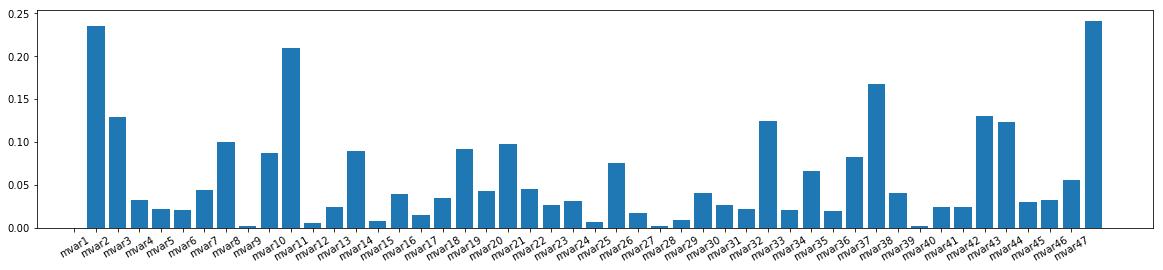

In [53]:
#LR feature imp
lr_coef = clf.coef_.reshape(-1, 1)
plt.figure(figsize=(20, 4))
plt.bar(range(1, len(lr_coef)+1), np.abs(lr_coef) )
plt.xticks(range(len(gameX.columns)), gameX.columns, rotation = 30)
plt.show()

In [54]:
#Method 3

In [55]:
#current

In [56]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

import time

In [57]:
def modelfit(alg, dtrainX, dtrainY, predictors, useTrainCV=True, cv_folds=4, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
#         xgb_param['num_class']=2
        xgtrain = xgb.DMatrix(dtrainX[predictors].values, label=dtrainY.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
             early_stopping_rounds=early_stopping_rounds,stratified=True)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrainX[predictors], dtrainY ,eval_metric='error')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrainX[predictors])
    dtrain_predprob = alg.predict_proba(dtrainX[predictors])[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrainY.values, dtrain_predictions))
    #print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob))
                    
    #feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    #feat_imp.plot(kind='bar', title='Feature Importances')
    #plt.ylabel('Feature Importance Score')



In [58]:
#Choose all predictors except target & IDcols
t=time.time()
predictors = [x for x in gameX.columns]
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=4, #4
 min_child_weight=1,
 gamma=0,
reg_alpha = 0.05,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

modelfit(xgb1, gameX, gameY, predictors)

print('time',time.time()-t)


Model Report
Accuracy : 0.8243
time 69.31128191947937


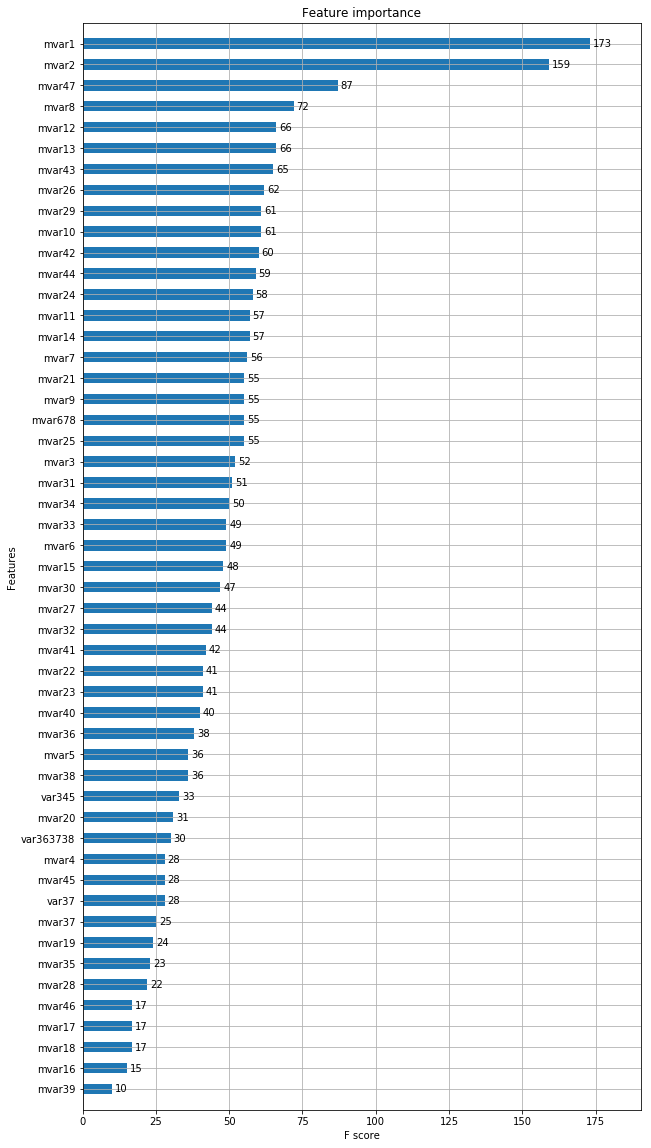

In [39]:
#xgb feature imp
from xgboost import plot_importance
ax = plot_importance(xgb1, height=0.5)
fig = ax.figure
fig.set_size_inches(10,20)
plt.show()

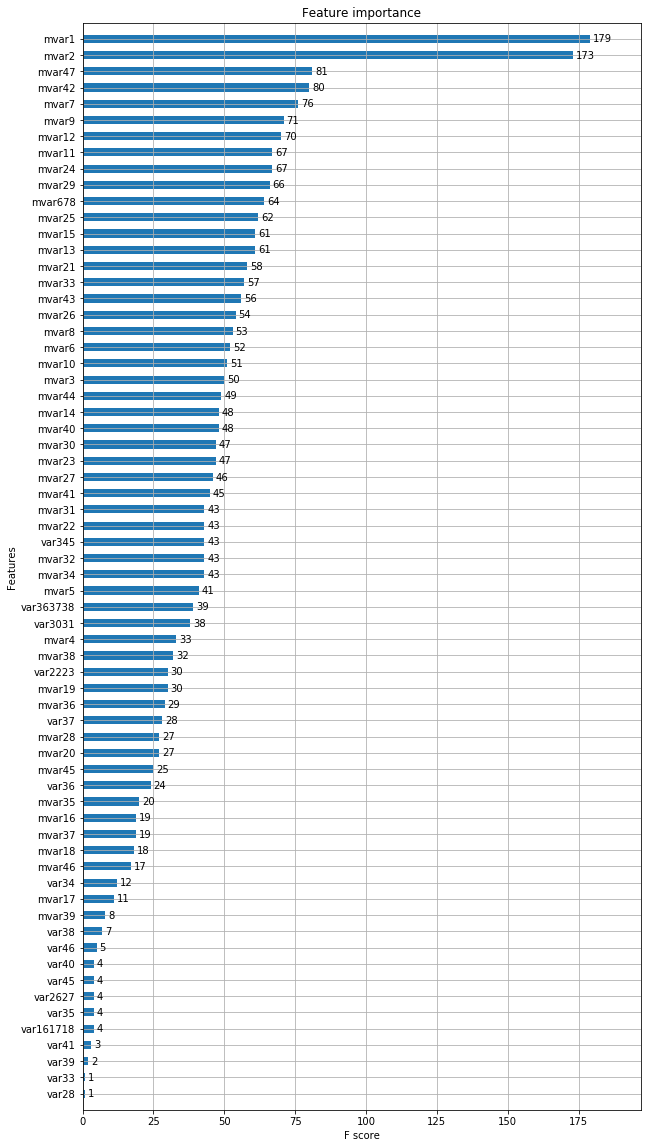

In [83]:
#xgb feature imp
from xgboost import plot_importance
ax = plot_importance(xgb1, height=0.5)
fig = ax.figure
fig.set_size_inches(10,20)
plt.show()

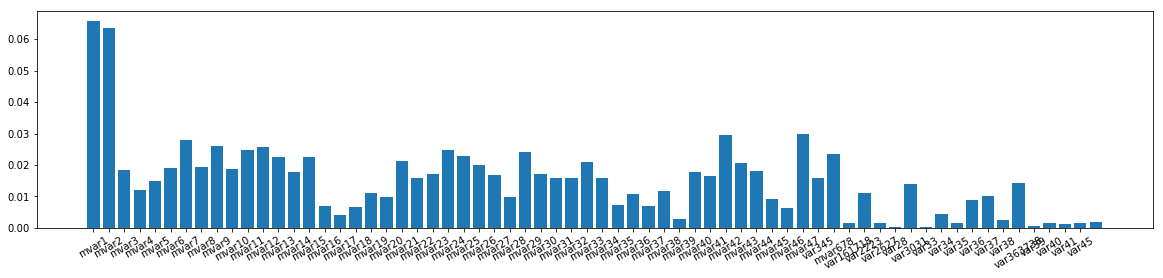

In [68]:
# XGB feature imp
plt.figure(figsize=(20, 4))
plt.bar(range(1, len(xgb1.feature_importances_)+1), xgb1.feature_importances_)
plt.xticks(range(1, len(xgb1.feature_importances_)), gameX.columns, rotation = 30)
plt.show()

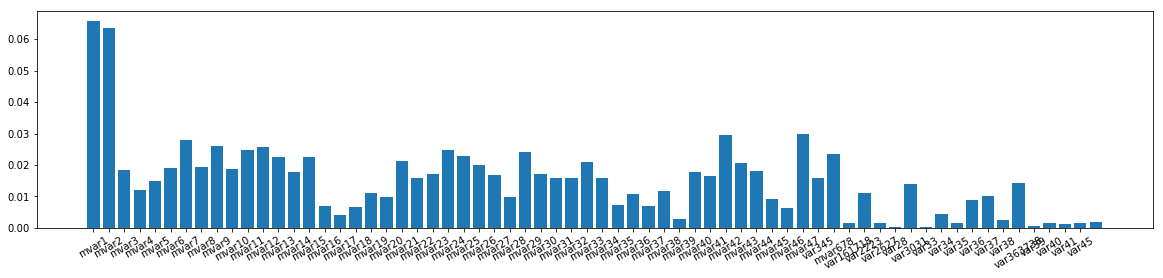

In [68]:
# XGB feature imp
plt.figure(figsize=(20, 4))
plt.bar(range(1, len(xgb1.feature_importances_)+1), xgb1.feature_importances_)
plt.xticks(range(1, len(xgb1.feature_importances_)), gameX.columns, rotation = 30)
plt.show()

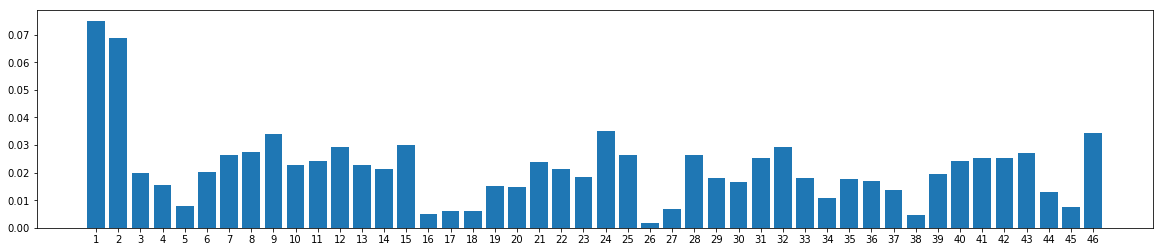

In [81]:
# XGB feature imp
plt.figure(figsize=(20, 4))
plt.bar(range(1, len(xgb1.feature_importances_)+1), xgb1.feature_importances_)
plt.xticks(range(1, len(xgb1.feature_importances_)+1))
plt.show()

In [59]:
pred2 = xgb1.predict_proba(leaderX)

In [60]:
pred1 = pd.DataFrame(pred1)
pred1['application_key'] = leaderAppID
print(pred1.shape)

pred2= pd.DataFrame(pred2)
pred2['application_key'] = leaderAppID
pred2.shape

(25000, 3)


(25000, 3)

In [61]:
pred1

,0,1,application_key
0,0.744983,0.255017,350053
1,0.884746,0.115254,350054
2,0.800212,0.199788,350055
3,0.543523,0.456477,350056
4,0.724498,0.275502,350057
5,0.799576,0.200424,350058
6,0.727787,0.272213,350059
7,0.872432,0.127568,350060
8,0.833368,0.166632,350061
9,0.746011,0.253989,350062


In [62]:
pred2

,0,1,application_key
0,0.863583,0.136417,350053
1,0.981587,0.018413,350054
2,0.956605,0.043395,350055
3,0.770681,0.229319,350056
4,0.766061,0.233939,350057
5,0.973787,0.026213,350058
6,0.867007,0.132993,350059
7,0.990688,0.009312,350060
8,0.985968,0.014032,350061
9,0.870953,0.129047,350062


In [63]:
pred1 = pred1.sort_values(by = 0,kind = 'mergesort',ascending = False)

pred2 = pred2.sort_values(by = 0,kind = 'mergesort',ascending = False)
# pred2 = pred2.sort_values(by = 0,kind = 'mergesort',ascending = True) #true for xgb method3

In [64]:
cols = pred1.columns.tolist()
cols = cols[-1:] + cols[:-1]
pred1 = pred1[cols]

cols = pred2.columns.tolist()
cols = cols[-1:] + cols[:-1]
pred2 = pred2[cols]

In [65]:
pred1 = pred1.loc[:,'application_key':]

pred2 = pred2.loc[:,'application_key':]

In [66]:
submit1 = pred1['application_key'][:10000]
submit1 = pd.DataFrame(submit1)
submit1[0] = 0

submit2 = pred2['application_key'][:10000]
submit2 = pd.DataFrame(submit2)
submit2[0] = 0

In [67]:
# submit.iloc[-400:, 1] = 1

In [68]:
submit1

,application_key,0
23338,373391,0
15911,365964,0
21128,371181,0
19140,369193,0
23607,373660,0
3642,353695,0
7820,357873,0
24868,374921,0
22990,373043,0
21731,371784,0


In [69]:
submit2

,application_key,0
15263,365316,0
24638,374691,0
14078,364131,0
3302,353355,0
562,350615,0
21478,371531,0
21506,371559,0
20481,370534,0
12773,362826,0
21597,371650,0


In [70]:
no = 278

# submit1.to_csv('flabbergasted_IITGuwahati_'+str(no)+'.csv',header = False, index = False)
submit2.to_csv('flabbergasted_IITGuwahati_'+str(no+1)+'.csv',header = False, index = False)

no+=1

In [41]:
no

279

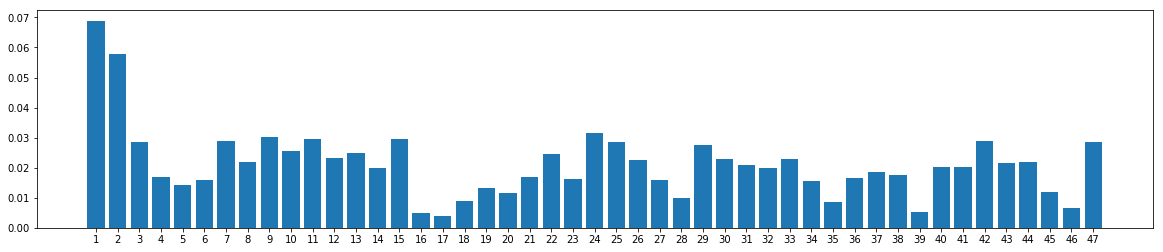

In [48]:
# XGB feature imp
plt.figure(figsize=(20, 4))
plt.bar(range(1, len(xgb1.feature_importances_)+1), xgb1.feature_importances_)
plt.xticks(range(1, len(xgb1.feature_importances_)+1))
plt.show()